In [1]:
knitr::opts_chunk$set(echo = TRUE)


## Introduction

The previous workbook provided a broad survey of ggplot functionality along with some hands-on experience making a variety of plots. This built on last week's exposure to some visualisation exercises in the context of statistical inference and sampling. This workbook aims to combine the two, building your visualisation skills through the active interrogation of a penguin data set.


## Preliminaries

Your first block of code should install any packages and load in the corresponding libraries. You can also read in any data files here.

In what follows, we will be using the penguins data that is part of the "palmerpenguins" package along with the now familiar tidyverse.


In [2]:
library(tidyverse)

# Remove the comment if "palmerpenguins" has not yet been installed
# install.packages('palmerpenguins')

library(palmerpenguins)

head(penguins)


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.8     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Let's get to know this data set. The code block uses "str", but you may also want to try out "glimpse", which is similar to "head" above. Or, you can use "view" to bring up the tibble as a spreadsheet in another window. So many options, at least for a dataset of this size. (You wouldn't want to use view if the tibble had 1000000 rows!)



In [3]:
# str(penguins)
glimpse(penguins)


Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel~
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse~
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, ~
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, ~
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186~
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, ~
$ sex               <fct> male, female, female, NA, female, male, female, male~
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007~


The tibble contain data for 344 penguins. There are 3 different species of penguins in this dataset, observed across 3 islands in the Palmer Archipelago, Antarctica. For most of the penguins, additional characteristics of the penguins were recorded.

## Exploring the Data

You can already see above that there is some missing data, conveniently encoded here as "NA". For how many of the 344 penguins is there some data missing? Write code in the block below to answer this question. As is generally the case in R, there are many ways to do this. You may for example wish to use "is.na" or "complete.cases", or do something else entirely.


In [4]:
penguins %>% is.na() %>% sum()

[1] 19

Now let's get a first look at the data. Make a simple scatterplot of flipper length versus bill length.



Warning message:
"Removed 2 rows containing missing values (geom_point)."


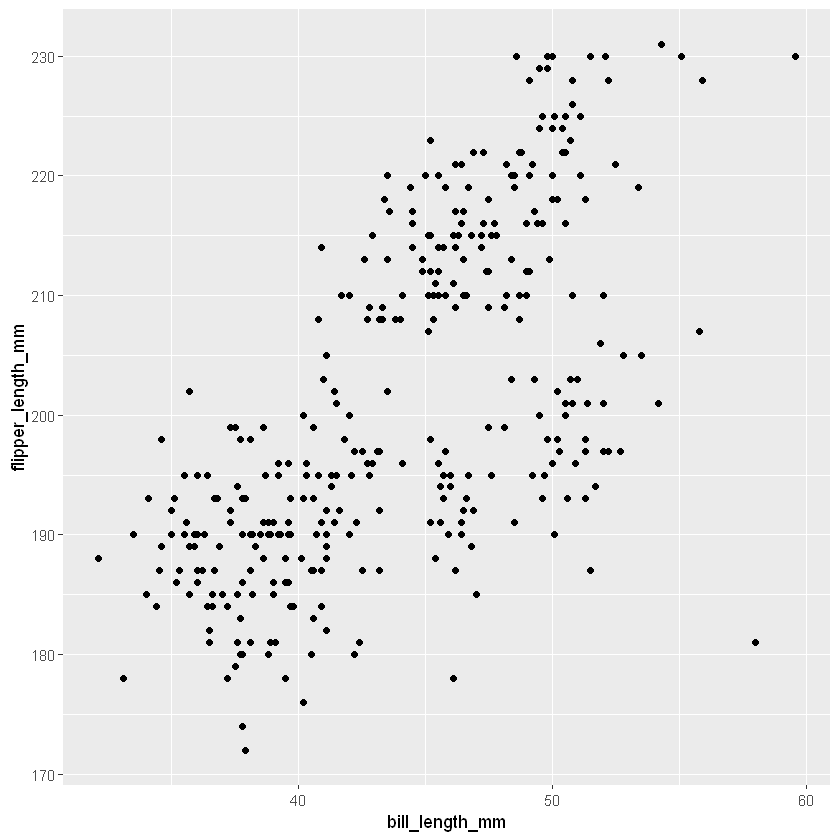

In [5]:
ggplot(data = penguins, mapping = aes(x = bill_length_mm, y = flipper_length_mm)) +
  geom_point()


Notice the comment that appears above the plot: "Warning: Removed 2 rows containing missing values (geom_point)". This means that measurements were missing for two of the penguins; however, ggplot is smart enough to ignore those rows rather than return an error.

You will have observed from the plot that flipper length tends to increase with bill length. This is often the case with such measurements, because in general a larger penguin is likely to have larger features. We can quantify the strength of the linear relationship by computing the correlation.


In [6]:
cor.test(penguins$bill_length_mm,penguins$flipper_length_mm)




	Pearson's product-moment correlation

data:  penguins$bill_length_mm and penguins$flipper_length_mm
t = 16.034, df = 340, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5912769 0.7126403
sample estimates:
      cor 
0.6561813 


We can also add the linear trend line to the plot using geom_smooth. To do this yourself, copy your ggplot code from above to the code block below and add "geom_smooth(method='lm')". 



`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


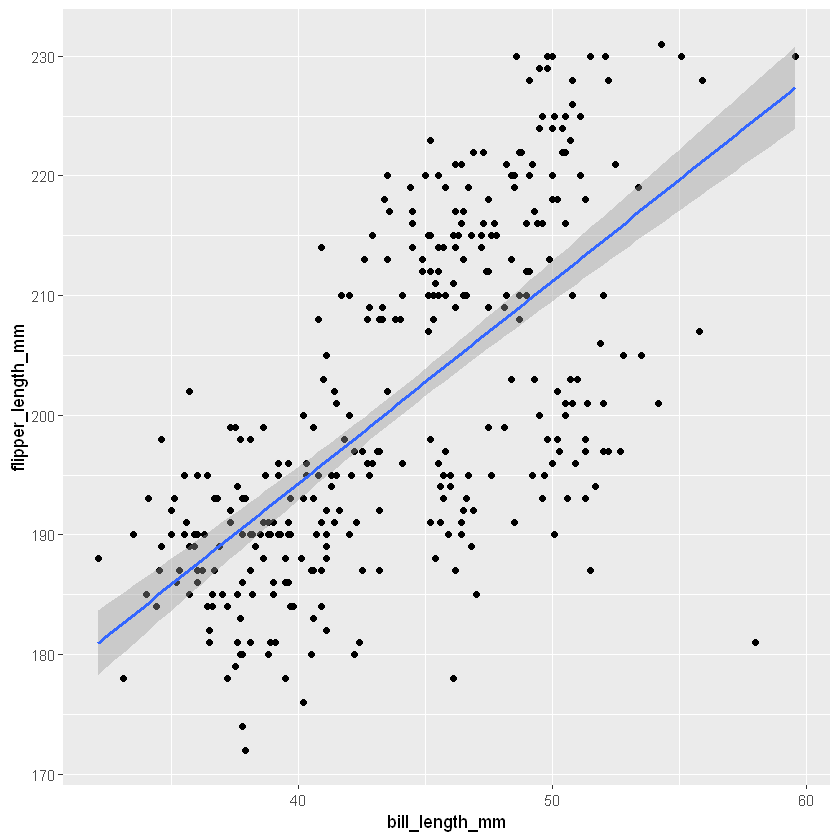

In [7]:
ggplot(data = penguins, mapping = aes(x = bill_length_mm, y = flipper_length_mm)) +
  geom_point() + geom_smooth(method='lm')

Notice the additional comment now above the plot: "`geom_smooth()` using formula 'y ~ x'". You may recall this syntax from BIOL 2202. When we used "method='lm'", we told R to construct a linear model of y (flipper length) as a function of x (bill length). The call to geom_smooth then adds the result as the regression line.

Let's consider another pair of measurements: body mass and bill depth. Run the same correlation test as above on those two measurements:


In [8]:
cor.test(penguins$body_mass_g,penguins$bill_depth_mm)




	Pearson's product-moment correlation

data:  penguins$body_mass_g and penguins$bill_depth_mm
t = -9.8699, df = 340, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5504192 -0.3851403
sample estimates:
       cor 
-0.4719156 


In a sentence, describe the results of this correlation test in the block below.



According to the correlation test, there was a negative correlation between bill depth and body weight, and bill depth decreased with increasing body weight.



Let's also visualise the data, again using a scatterplot, this time with bill depth on the y-axis and body mass on the x-axis. Do not use geom_smooth to add a line just yet.



Warning message:
"Removed 2 rows containing missing values (geom_point)."


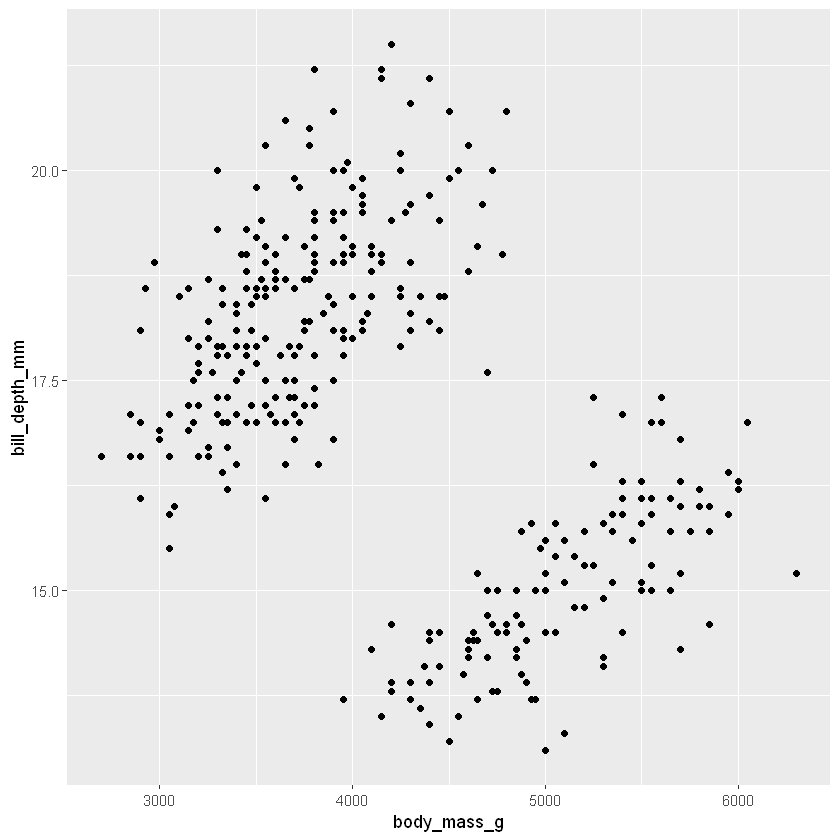

In [9]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, y = bill_depth_mm)) +
  geom_point()



What does this plot tell you about the relationship between bill depth and body mass? Describe your observations in the block below.



The plot shows the distribution of bill depth and body weight was roughly divided into two regions in which bill depth increased with increasing body weight.



Now let's add the linear trend line to the plot.



`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


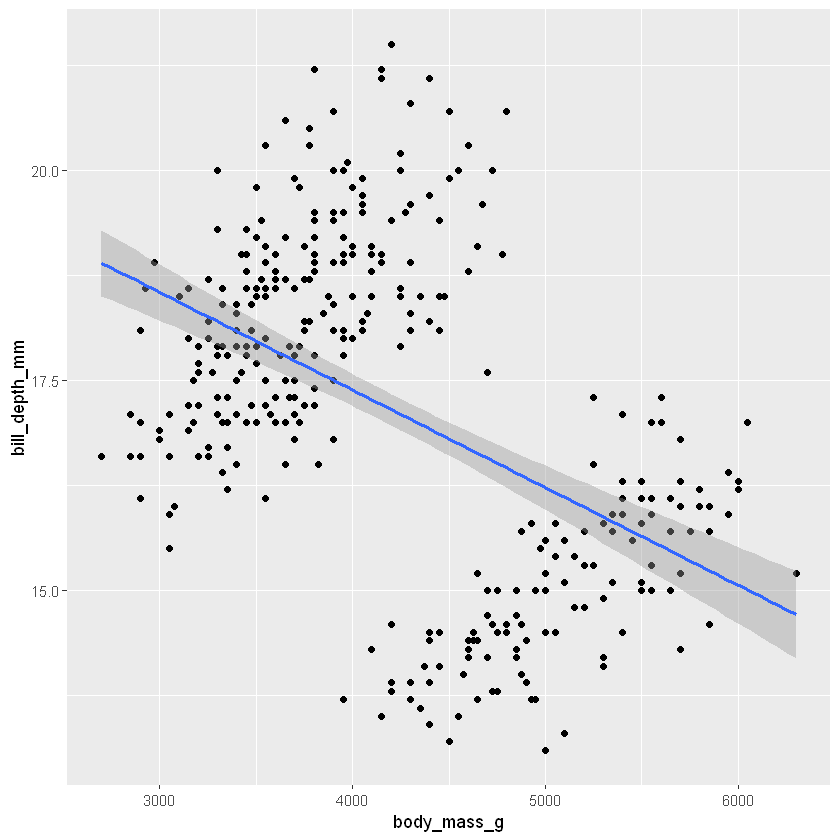

In [10]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, y = bill_depth_mm)) +
  geom_point() + geom_smooth(method='lm')




Is that what you expected? Is the regression line a good model of how bill depth varies with body mass? Comment in the block below.



The regression line is not a good model for the change of bill depth with body weight, because linear regression only forcibly gives a straight line with the smallest residual error under the current data set, and only by selecting an appropriate data set can a regression line that conforms to the linear relationship be fitted.



## Further Exploring the Data

When data is heterogeneous to the extent that there are distinct clusters, it is usually best to deal with the heterogeneity before calculating statistics or constructing models. This is one of the reasons why visualisation is so crucial! Here, the plot makes it very clear that there are two distinct clusters, though for the moment the source of these clusters is unknown.

Let's dig a little deeper into the data to understand how the three penguin species differ. Try making a box plot of the body mass distributions for each species.


Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."


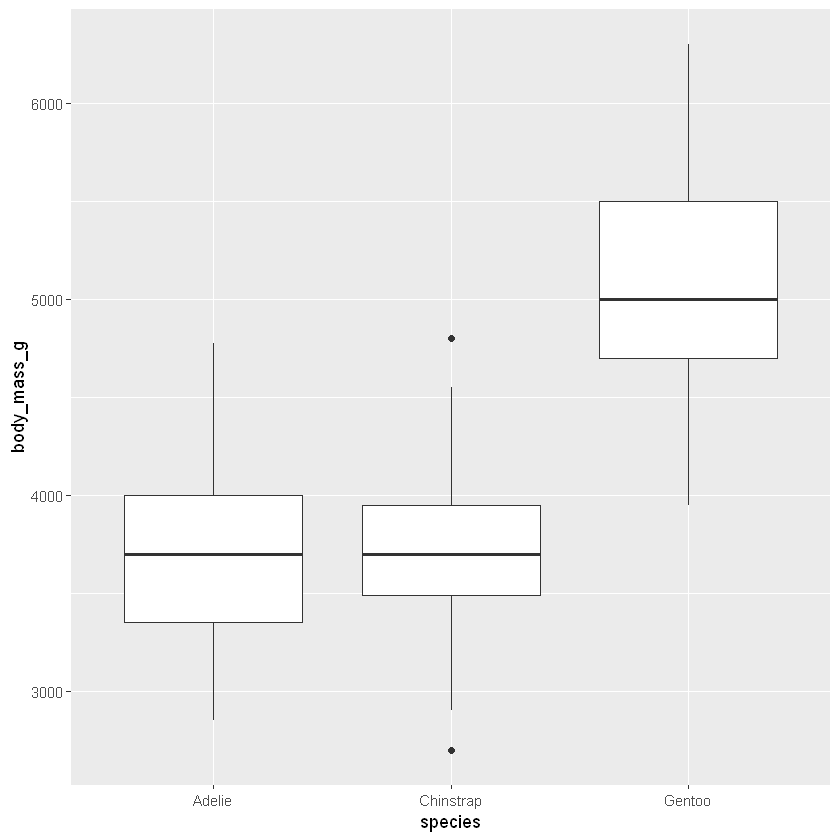

In [11]:
ggplot(data = penguins, mapping = aes(x = species, y = body_mass_g)) +
   geom_boxplot()



One of the species appears to be heavier than the others. Let's reinforce that observation with a more informative plot that also shows the individual values (points). This could be a violin plot with jitter, or something else of your choosing.



Warning message:
"Removed 2 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


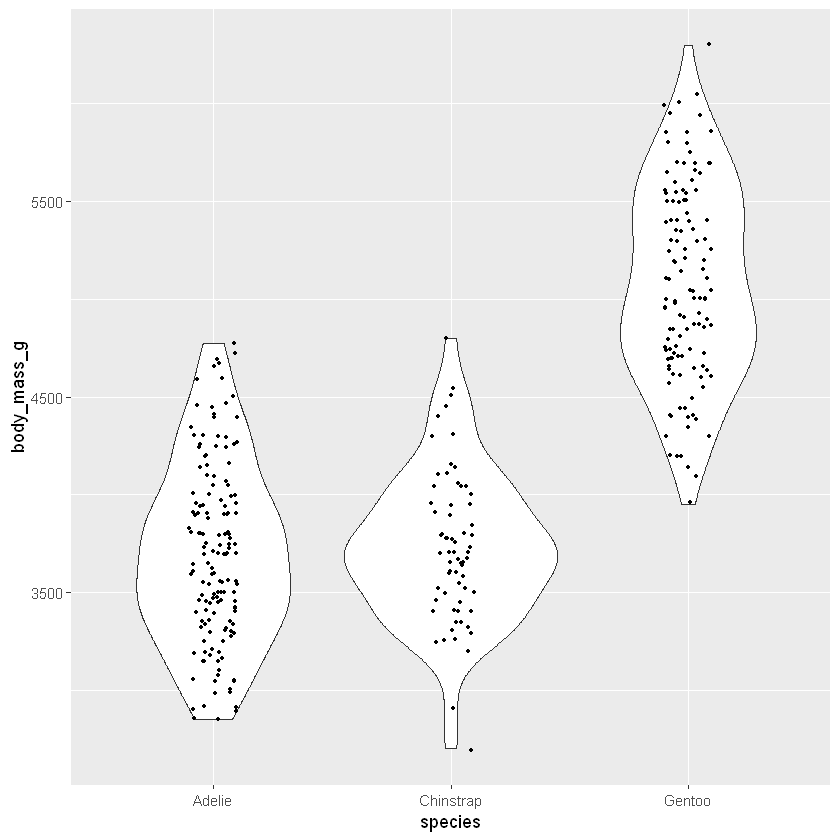

In [12]:
ggplot(data = penguins, mapping = aes(x = species, y = body_mass_g)) +
   geom_violin() + geom_jitter(shape=20, position = position_jitter(0.1))



These plots suggest that species differences may be responsible for the clusters previously observed. Let's repeat the scatterplot that showed the clusters, but use a different colour for each species. Write that code in the block below.



Warning message:
"Removed 2 rows containing missing values (geom_point)."


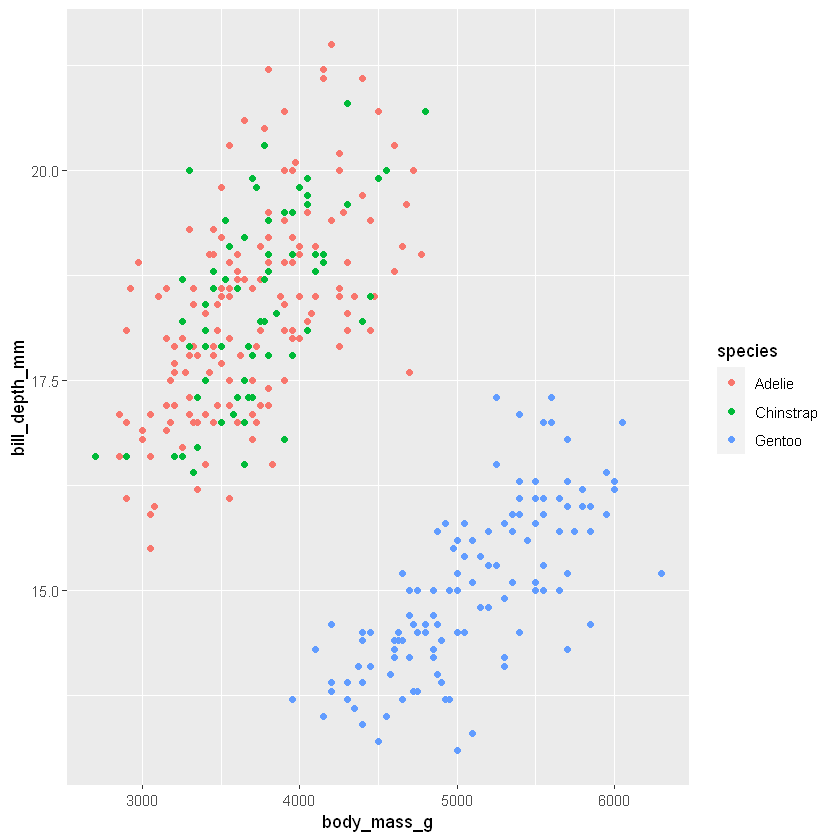

In [13]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, y = bill_depth_mm, colour = species)) +
  geom_point() 


Wouldn't it be nice if we could also indicate the linear trend by species? Try just adding geom_smooth again and see what happens! Below we will call this your very colourful plot.



`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


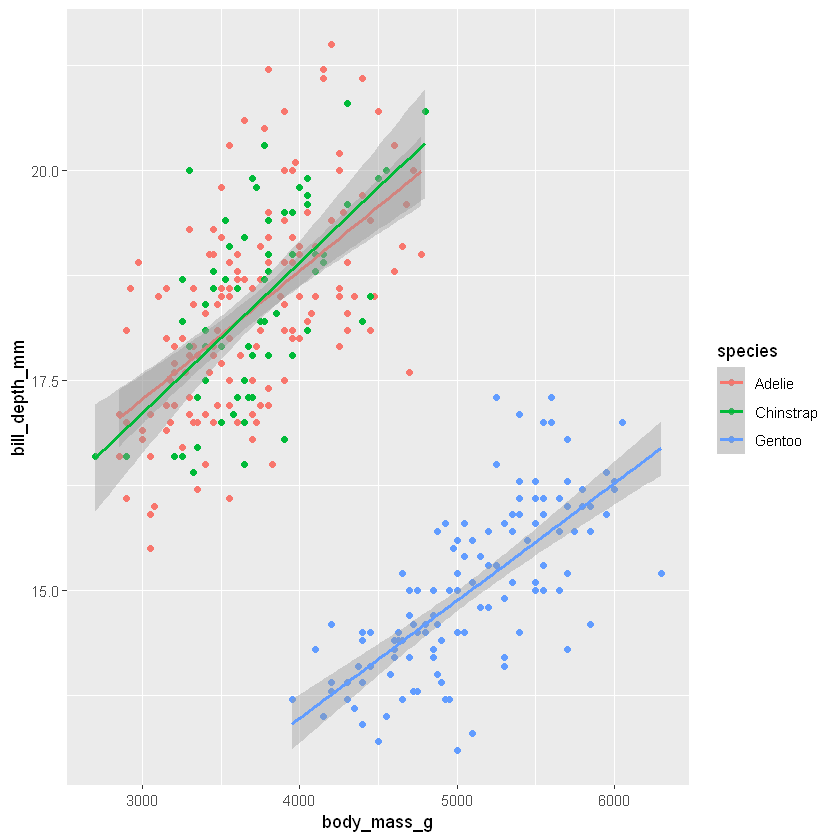

In [14]:
ggplot(data = penguins, mapping = aes(x = body_mass_g, y = bill_depth_mm, colour = species)) +
  geom_point() + geom_smooth(method='lm')



R made that so easy! Notice the consistent, positive linear trends for each species. So, while the overall correlation is quite negative, the within-species correlations are quite positive. This is a phenomenon known as Simpson's Paradox (or the Yule-Simpson Effect), and it happens uncomfortably often. This is almost as bad as when your scatterplot shows the face of a monkey (remember Workshop 2?), except that it is very real. Always visualise your data when possible, as soon as possible...

# A Brief Digression into Linear Models

A consequence of the above is that neither standard correlation nor regression are appropriate to the data. It appears as though we have a common slope but multiple intercepts. We can fit that model in R using lm: 


In [15]:
common_slope_model <- lm(bill_depth_mm~body_mass_g+species,data=penguins)
summary(common_slope_model)


Call:
lm(formula = bill_depth_mm ~ body_mass_g + species, data = penguins)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2539 -0.6182  0.0093  0.5075  2.7038 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      12.7637665  0.3887100  32.836   <2e-16 ***
body_mass_g       0.0015085  0.0001032  14.611   <2e-16 ***
speciesChinstrap  0.0253148  0.1283796   0.197    0.844    
speciesGentoo    -5.4390181  0.1776394 -30.618   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8788 on 338 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8037,	Adjusted R-squared:  0.802 
F-statistic: 461.4 on 3 and 338 DF,  p-value: < 2.2e-16


How do we read these results? Species is a factor whose first level is Adelie, and you can check this by calling "levels(penguins$species)". The intercept for the model, shown as "(Intercept)" above, corresponds to the intercept for the Adelie regression line. If we were to extend the x-axis to reach zero and also extend the red line at a constant slope, then this intercept (12.763) is where that line would cross the y-axis at x=0. On the other hand, "speciesChinstrap" represents the *difference* between Adelie intercept and the Chinstrap intercept. So the Chinstrap intercept is 12.763 + 0.025 = 12.788. Likewise, the Gentoo intercept is 12.763 + -5.439 = 7.324, a lower intercept which follows the intuition from the plot.

The entry for "body_mass_g" is the common regression slope and it appears to be highly significant (as in nonzero). The intercept is likewise highly significant (also as in nonzero); however, "speciesChinstrap" is not. That is, because we cannot distinguish the regression lines for Adelie and Chinstrap, we do not observe a significant *difference* between them.

The model is a direct reflection of the plot, and it was easy to guess which estimates would be significant. So clear was the picture that we did not even bother considering whether each species might have different slopes, but we could have tested that too. You may recall that different slopes would be captured by an *interaction* between body_mass_g and species. This makes intuitive sense: if body_mass_g is the slope, then an interaction with species means that the slope is species dependent. We can add the interaction to the model by replacing "+" in the lm statement with "*":


In [16]:
different_slope_model <- lm(bill_depth_mm~body_mass_g*species,data=penguins)
summary(different_slope_model)



Call:
lm(formula = bill_depth_mm ~ body_mass_g * species, data = penguins)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27393 -0.61794  0.00412  0.50673  2.70180 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  12.6895722  0.5838823  21.733  < 2e-16 ***
body_mass_g                   0.0015286  0.0001566   9.762  < 2e-16 ***
speciesChinstrap             -0.9355210  1.2005658  -0.779    0.436    
speciesGentoo                -4.8120456  0.9949620  -4.836 2.02e-06 ***
body_mass_g:speciesChinstrap  0.0002572  0.0003204   0.803    0.423    
body_mass_g:speciesGentoo    -0.0001289  0.0002224  -0.580    0.562    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8794 on 336 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8046,	Adjusted R-squared:  0.8017 
F-statistic: 276.7 on 5 and 336 DF,  p-value: < 2.2e-16


The last two entries of the summary are the interaction terms (indicated by ":") and as expected are not significant.

We will return to models in Week 8. This digression was a preview whose purpose was to emphasise how visualisation and models are complementary, with models often quantifying what has been qualitatively observed.

# A Brief Digression into Permutations, again

In the previous workshop, we explored permutations as an approach to understanding how our statistics behave under the null hypothesis. To briefly reinforce those exercises, let's consider here whether the differences we just observed between penguin species are real. (Spoiler alert: they obviously are, and this is just to make a point.) To get a sense of how things would look if the relationship between bill depth and body mass was not mediated by species, let's scramble the species labels in the tibble.


In [17]:
permuted_penguins <- penguins
permuted_penguins$species <- permuted_penguins$species[sample(length(penguins$species))]
head(permuted_penguins)


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Gentoo,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Gentoo,Torgersen,39.3,20.6,190,3650,male,2007


What we've just done is scrambled the first column and kept the remaining columns unchanged. Go ahead and repeat your very colourful plot, pasting the code below and replacing penguins with permuted_penguins.



`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


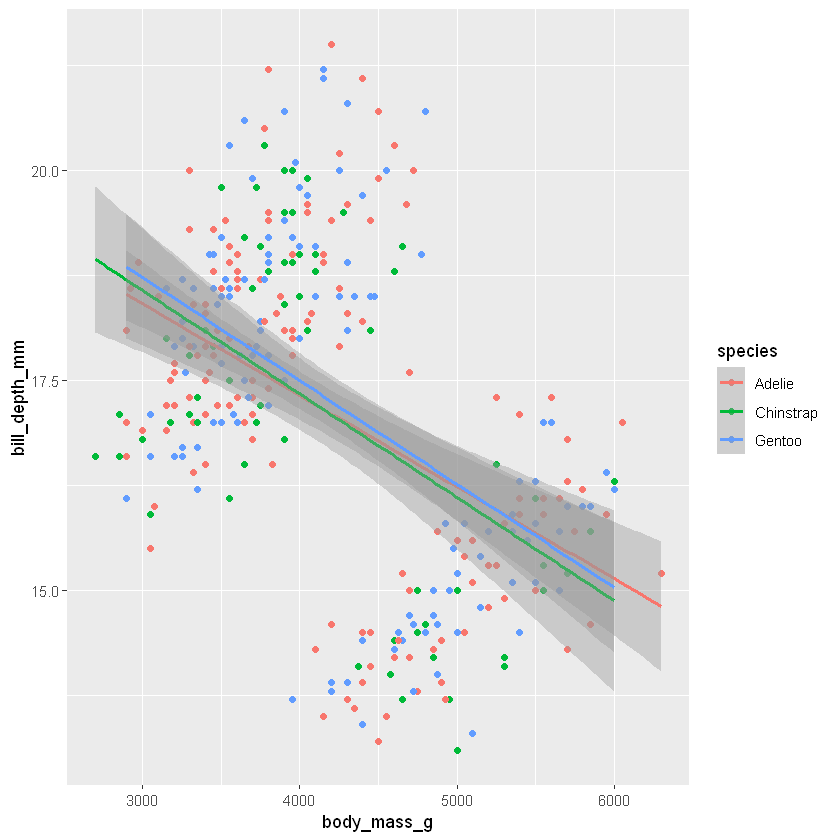

In [18]:
ggplot(data = permuted_penguins, mapping = aes(x = body_mass_g, y = bill_depth_mm, colour=species)) +
  geom_point() + geom_smooth(method='lm')


Qualitatively speaking, if the lines in this plot look different than before, then the species differences are likely to be real. Of course, we would want to observe this across many permutations, because that is how we conclude that effect of species is unlikely to be due to chance. Feel free to run the previous two code blocks again (and again), re-randomising the species labels and then plotting the results. The permuted data behaves very different than the real data, suggesting the observed pattern in your very colourful plot is attributable to species differences. You see the same thing with the permuted boxplot, etc.:



Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."


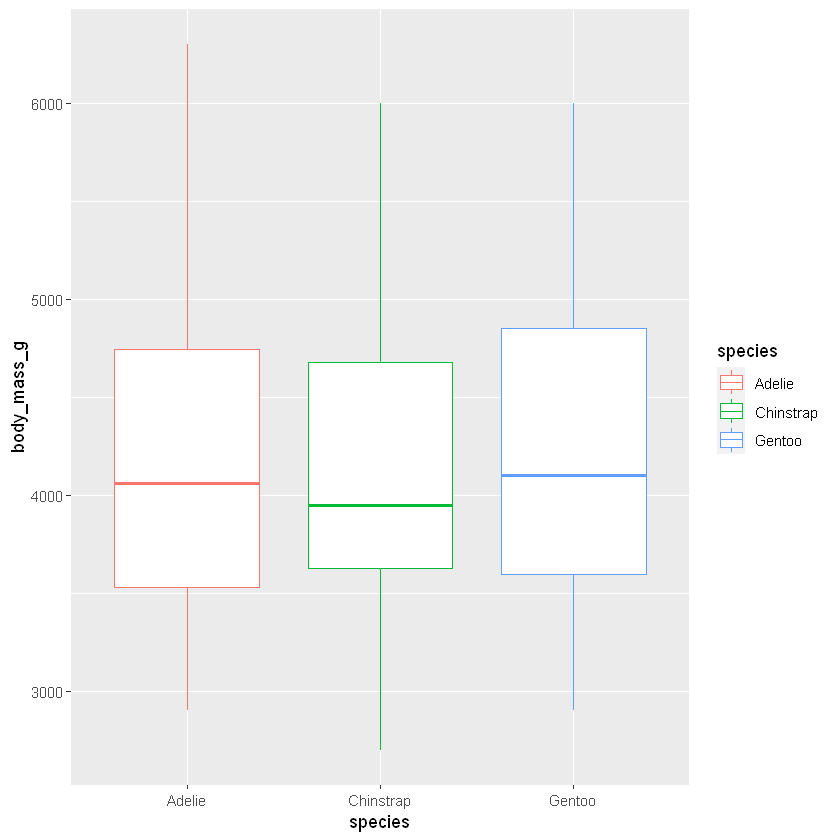

In [19]:
ggplot(data = permuted_penguins, mapping = aes(x = species,y = body_mass_g,colour=species)) +
  geom_boxplot() 


Just to drive the point home, let's generate a few more permuted versions of the above plot and contrast them with the true data.



Warning message:
"Removed 50 rows containing non-finite values (stat_boxplot)."


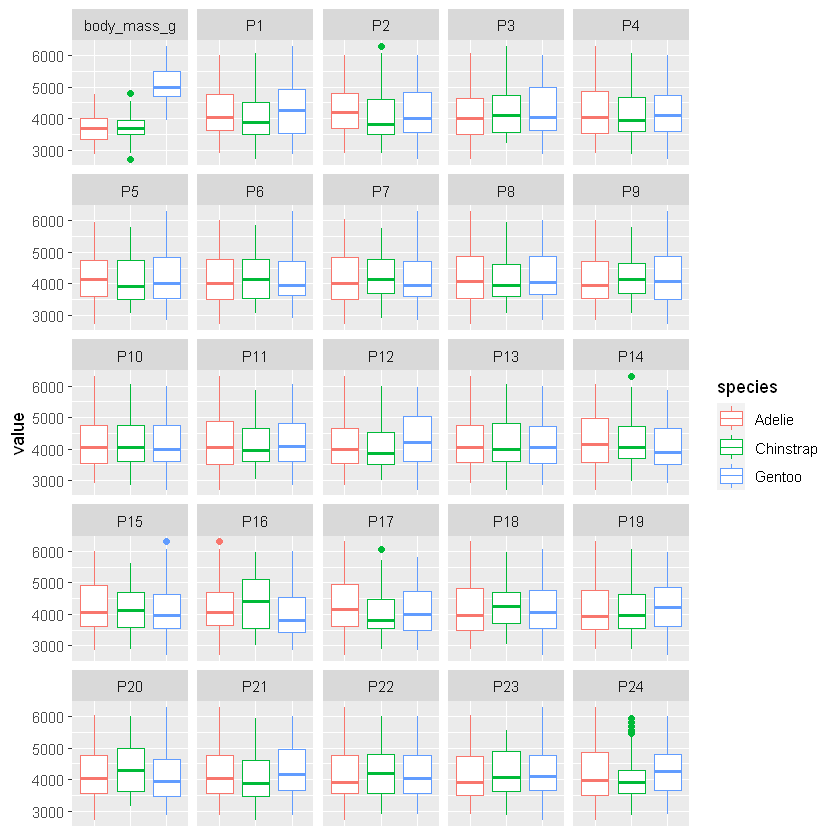

In [20]:
# This code block creates a plot matrix comparing the actual body mass box plot (upper right) to those obtained from many permutations

# Build a tibble to store the data, beginning with the actual data
perm_tibble <- penguins %>% select(species,body_mass_g)
# Set the number of permutations, here 24 for better viewing 
n_reps <- 24
# Grow the tibble column by column with permuted values
for (i in 1:n_reps)
{
    # Name the permutation reps P1,P2,...
    new_name <- paste("P",i,sep="")
    # Generate a permuted column of body mass values. Note that this is equivalent     to permuting the species labels; however, permuting values makes the plotting     easier
    new_col <- tibble(penguins$body_mass_g[sample(length(penguins$species))])
    # Assign the new column its name
    colnames(new_col) <- new_name
    # Attach the permuted column to the end of the growing tibble
    perm_tibble <- cbind(perm_tibble,new_col)
}
# Record the order of the column names for later use as plot order
factor_levels <- colnames(perm_tibble)[2:(n_reps+2)]
# Pivot the tibble built above into long form
plot_tibble <- pivot_longer(perm_tibble,cols=2:(n_reps+2),names_to = c("rep"))
# Turn the rep column into a factor, using the order stored above
plot_tibble$rep <- factor(plot_tibble$rep,levels=factor_levels)
# Plot a matrix of box plots, beginning with the real data, followed from left to right with P1,P2,etc. Set the number of columns in the plot matrix to 5 for viewing. Remove the x-axis annotations.
ggplot(plot_tibble,aes(x=species,y=value,colour=species))+geom_boxplot()+facet_wrap(~rep,ncol=5)+theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())


## Exploring the Data Even More

Remember that the 3 different species of penguins in this dataset were found across 3 islands in the Palmer Archipelago. We may also wish to discover whether there were differences in penguin characteristics between the islands. Of course, it may be that each species is unique to one island, in which case we could not distinguish between species differences and island differences. You may recall this concept from BIOL 2202 as "confounding". Let's use some tidyverse magic to count the number of each species on each island:


In [21]:
penguins %>% count(species,island)



species,island,n
<fct>,<fct>,<int>
Adelie,Biscoe,44
Adelie,Dream,56
Adelie,Torgersen,52
Chinstrap,Dream,68
Gentoo,Biscoe,124


It appears that only Adelie penguins were found on multiple islands. Let's make a visual comparison of their characteristics on each island and see whether we can spot any differences. As a start, let's compare box plots of body mass. Note how the code is constructed. Because we are only comparing Adelie penguins, we use filter to omit the non-Adelie rows of penguins. We then send the filtered tibble as data to ggplot. The pipes (%>%) join the code together, and each command to the right uses the output from the left as its data input. As we have made no assignments (i.e. using "<-" or "="), no variables have changed.



Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


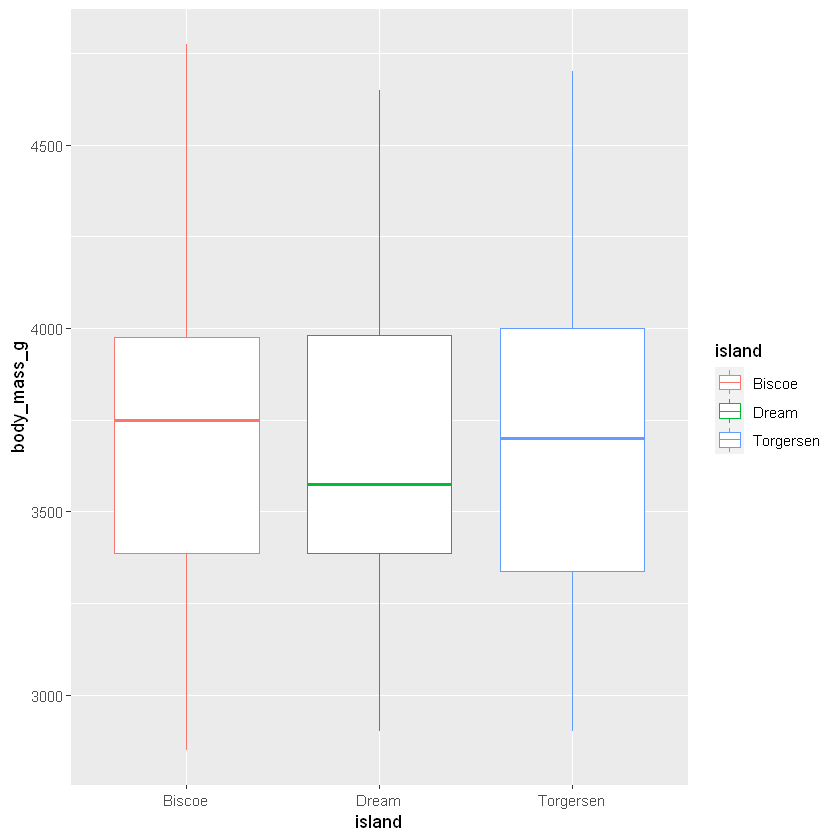

In [22]:
penguins %>% filter(species == "Adelie") %>% ggplot(mapping = aes(x = island,y = body_mass_g,colour=island)) + geom_boxplot() 



Next, let's examine the relationship between body mass and bill depth for Adelie penguins on each island. Write code in the block below to do so, once again using geom_smooth.



`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


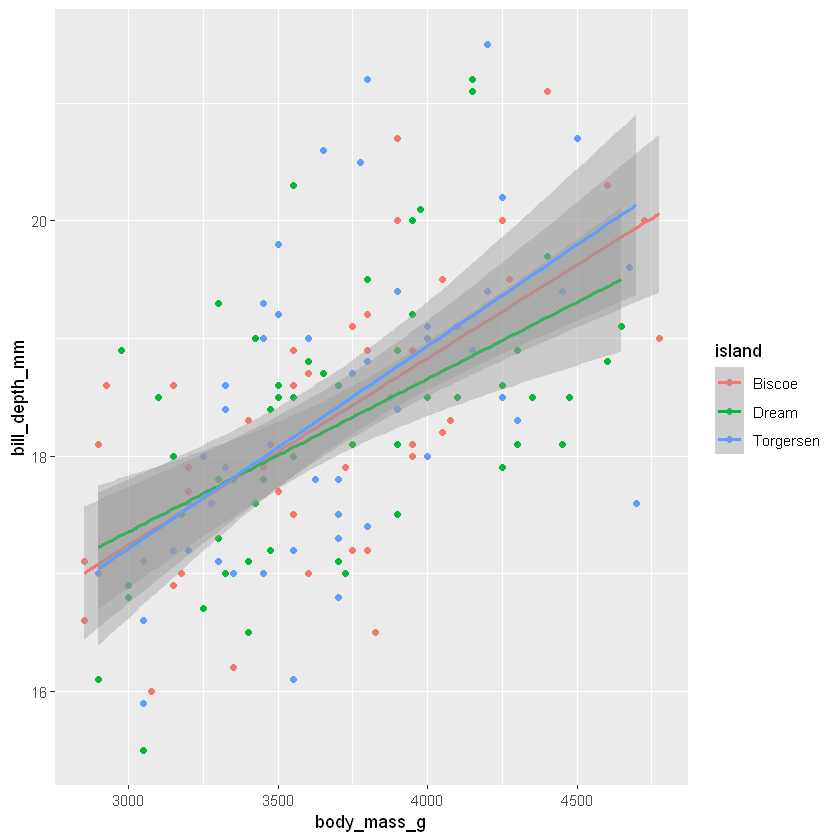

In [23]:
penguins %>% filter(species == "Adelie") %>%
    ggplot(mapping = aes(x = body_mass_g, y = bill_depth_mm, colour = island)) +
        geom_point() + geom_smooth(method='lm')




The relationship between bill depth and body mass does not appear to vary by island. (That is to say, if we were to run the linear model, we would not find a significant  body_mass_g:island interaction.)

There's so much more to consider. We have male penguins and female penguins, and perhaps their characteristics are different. Let's start by counting how many male and female penguins there are of each species in the dataset. Write code in the block below to do this.


In [24]:
penguins %>% count(species,sex)



species,sex,n
<fct>,<fct>,<int>
Adelie,female,73
Adelie,male,73
Adelie,NA,6
Chinstrap,female,34
Chinstrap,male,34
Gentoo,female,58
Gentoo,male,61
Gentoo,NA,5


Was NA counted as a sex in your table? That's not so helpful. Let's filter those out first. Finish the code block as above to do so.



In [25]:
penguins %>% filter(!(is.na(sex))) %>% count(species,sex)



species,sex,n
<fct>,<fct>,<int>
Adelie,female,73
Adelie,male,73
Chinstrap,female,34
Chinstrap,male,34
Gentoo,female,58
Gentoo,male,61


Now let's examine how body mass depends on species and sex. Use facet_wrap (or facet_grid) to make an informative plot, and be sure to filter out the NA values first.



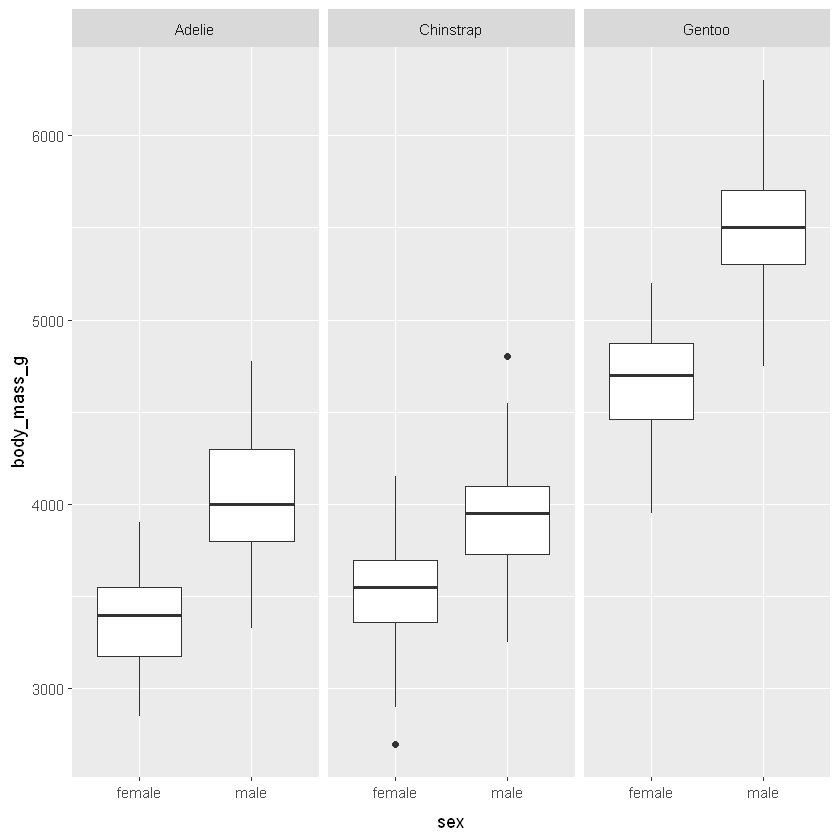

In [26]:
penguins %>% filter(!(is.na(sex))) %>% 
    ggplot(mapping = aes(x = sex, y = body_mass_g)) +
        geom_boxplot() + facet_wrap(~species)



Based on your plot, does one sex appear to be heavier than the other? Does the sex difference appear to differ by species (that is, does there appear to be a sex:species interaction)? Answer below, referencing the plot you just made.



From the graph, males weighed more than females in each species, meaning that the sex differences did not vary by species.



Previously we examined the relationship between bill depth and body mass across species. Let's now also consider the effect of sex, by including it in your very colourful plot as a shape.



`geom_smooth()` using formula 'y ~ x'



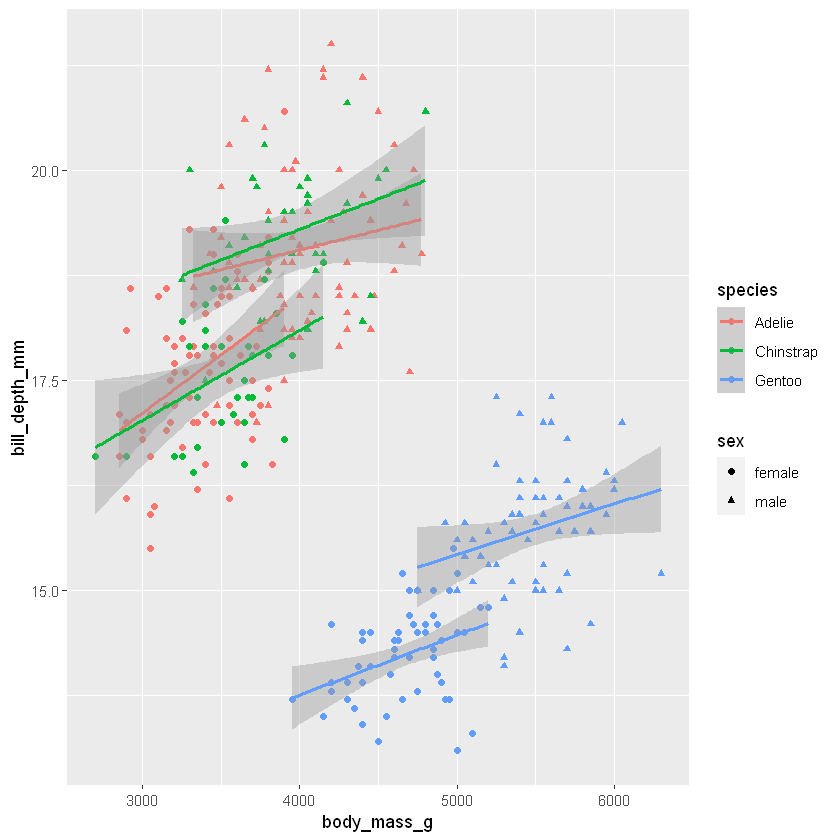

In [27]:
penguins %>% filter(!(is.na(sex))) %>%  
    ggplot(mapping = aes(x = body_mass_g, y = bill_depth_mm, colour = species, shape = sex)) +
        geom_point() + geom_smooth(method='lm')


Based on your plot, does the effect of body mass on bill depth (slope) appear to depend on either species or sex? Comment in the block below.



It can be seen from the figure that the relationship between body weight and beak of Gentoo penguins does not seem to have a difference in slope between the two genders, but for species Adelie and Chinstrap, the slope of the linear fitting results for females is larger than that for males, and gender affects body weight. Relationship to beak depth.


This is becoming tedious. There must be a way to visualise many relationships at once. Let's try out ggpairs in the package GGally.



In [28]:
#install.packages('GGally')
library(GGally)


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



You could just try out ggpairs(penguins) and see what happens. But a less messy approach would be to try it out on a subset of the data. Here's what happens when ggpairs is applied to the four continuous measurements:



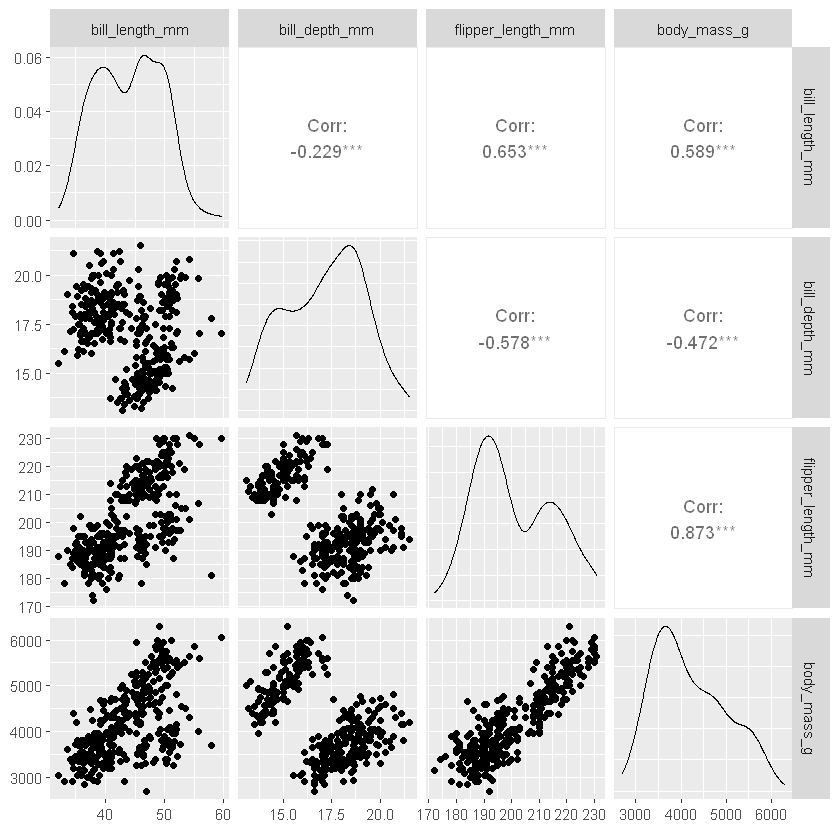

In [29]:
penguins %>% filter(!(is.na(sex))) %>% select(bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g) %>%
    ggpairs()


What was that?!? Calling ggpairs created a pairwise comparison of the four measurements. The 4x4 plot matrix contains a wealth of information. The diagonal shows the density (smoothed histogram) of each measurement, while their pairwise scatterplots are shown below the diagonal. Above the diagonal are the corresponding pairwise correlations.

Of course, not all information is useful, and we know already that the correlations in this dataset are misleading due to species differences. Let's next add species as a colour in the ggpairs plot.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



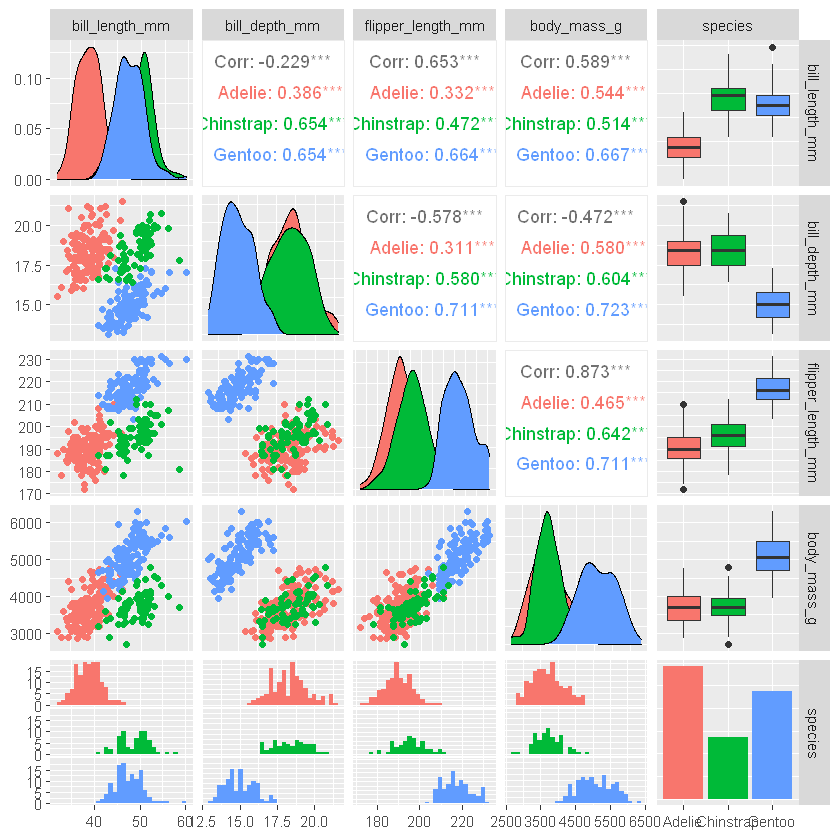

In [30]:
penguins %>% filter(!(is.na(sex))) %>% select(bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species) %>% ggpairs(aes(colour = species))



That changed things dramatically. Comment below on three things revealed by this ggpairs plot that could not be inferred from the previous version.



(1) Bill length and body mass have positive correlations in different species, respectively. 
(2) flipper length and body mass have positive correlations in different species, respectively. 
(3) Bill length and bill depth have positive correlations in different species, respectively.

Now create a similar plot, except with sex in place of species. This time, modify the transparency of the points by adding "alpha = 0.4" to the aesthetic. And don't forget to filter out the NA values.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



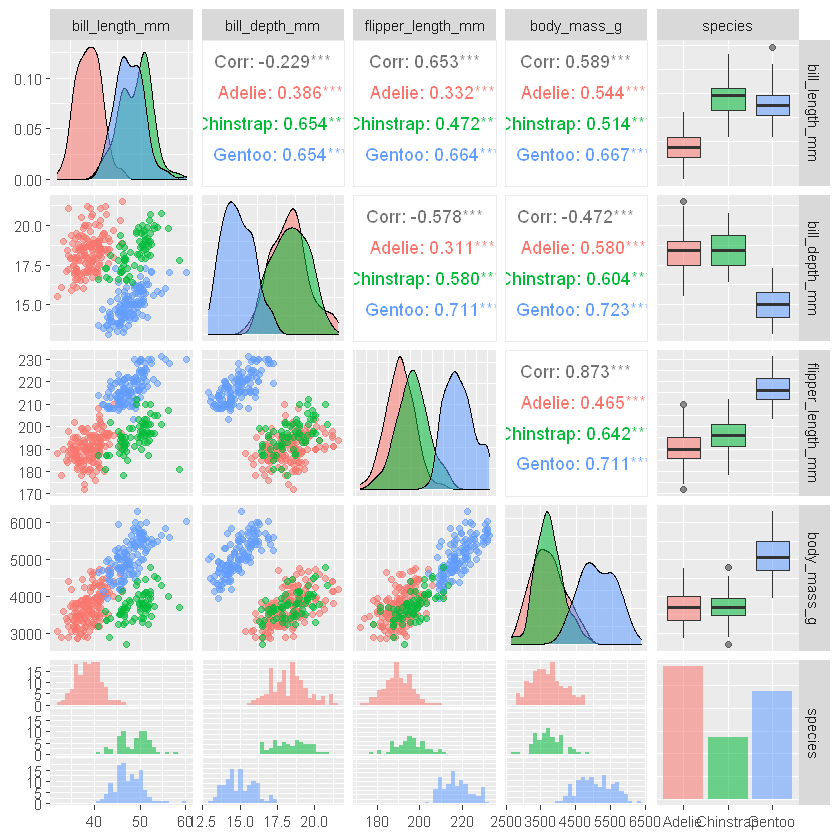

In [31]:
penguins %>% filter(!(is.na(sex))) %>% select(bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species) %>% 
   ggpairs(aes(colour = species, alpha = 0.4))



## Final Thoughts

The one aspect of the penguin data that we have not yet considered is year. For completeness, and maybe just for fun, let's use facet_grid to investigate the combined effect of year, species and sex on flipper length.


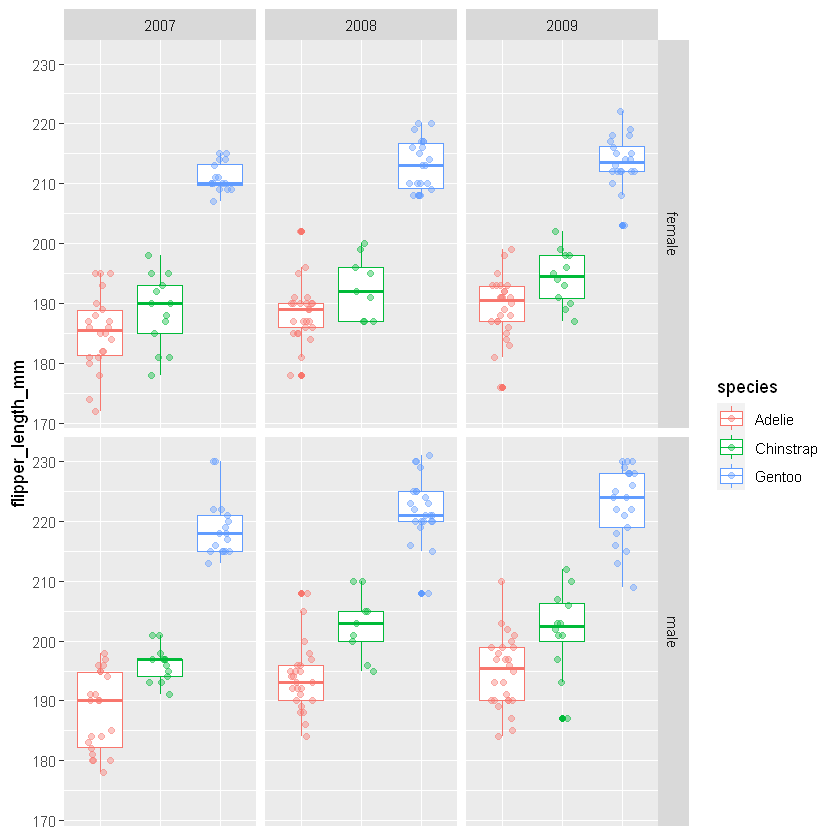

In [32]:
penguins %>% filter(!(is.na(sex))) %>% mutate(year = as.factor(year)) %>% ggplot(mapping = aes(x = species,y=flipper_length_mm, colour=species)) + geom_boxplot() + 
  geom_jitter(width = 0.2, height = 0, alpha = 0.4) + facet_grid(sex ~ year) + theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())


To check your understanding of ggplot commands, in the block below add comments explaining each line of the code used to make the previous plot. As examples, the first and last have been provided already.



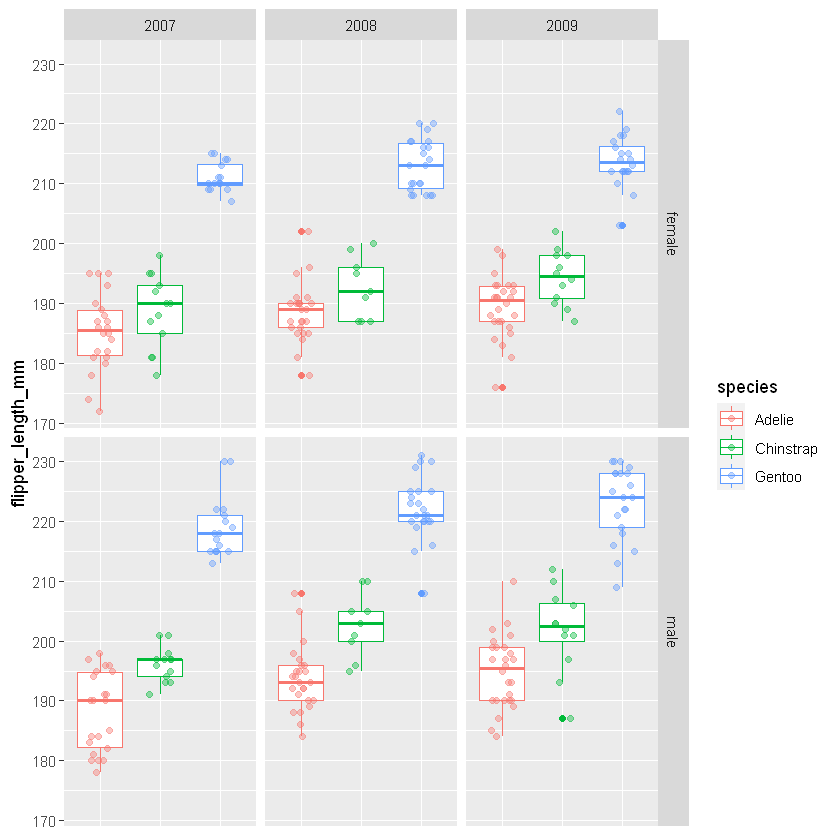

In [33]:
# Start with the tibble containing the data
penguins %>%
# Select columns which sex is not NA
filter(!(is.na(sex))) %>% 
# set year to factor type
mutate(year = as.factor(year)) %>% 
# ggplot with aesthetics as color in species  
ggplot(mapping = aes(x = species,y = flipper_length_mm, colour=species)) + 
# add boxplot with flipper_length~species
geom_boxplot() + 
# Add distribution of points with jitter to boxplot
geom_jitter(width = 0.2, height = 0, alpha = 0.4) + 
# Perform 2x2 faceting, with sex as the column and year as the row
facet_grid(sex ~ year) + 
# Remove the annotations on the x axis
theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())


## Extension

Suppose that you were given measurements of a penguin and asked to identify its species. Among the four measurements -- bill length, bill depth, flipper length, and body mass -- which one would be most informative? Which one would be least informative? If you could choose two of the four measurements to help you guess the species, which would they be, and why?


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie,0.06858125,0.06645887,0.03430684,0.12374522
Chinstrap,0.06837998,0.06163729,0.03642001,0.10295366
Gentoo,0.06529834,0.06574793,0.03031474,0.09847469


bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
<dbl>,<dbl>,<dbl>,<dbl>
0.1243083,0.1147248,0.06974164,0.1913965


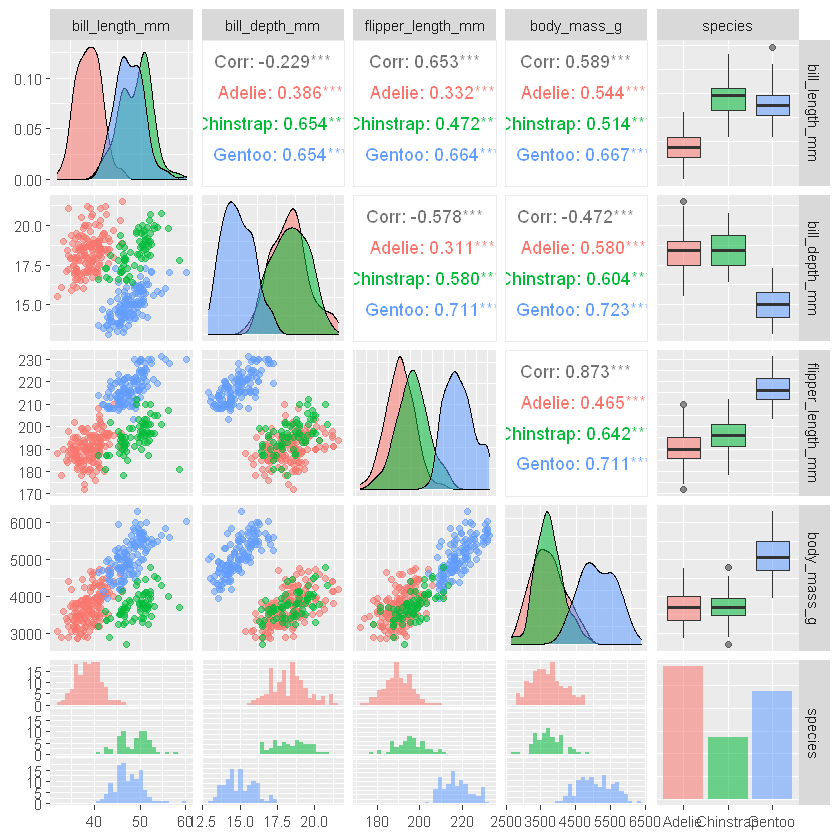

In [40]:
#resue ggpair code
penguins %>% drop_na() %>% select(bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species) %>% 
   ggpairs(aes(colour = species, alpha = 0.4))

#Giving the Coefficient of variation(CV) of each variable in each species
penguins %>% drop_na() %>% group_by(species) %>% 
    summarise(across(where(is.numeric) & !year,~sd(.x)/mean(.x))) %>% ungroup()
#Giving the Coefficient of variation(CV) of each variable in all samples
penguins %>% drop_na() %>% summarise(across(where(is.numeric) & !year,~sd(.x)/mean(.x)))

By calculating the coefficient of variation of each parameter in different species, it can be seen that the flipper length has the smallest intraspecific variation, and in the last column of the ggpair graph, it can be seen that the three species are quite different in distribution, so it is most suitable as a means of species comparison.
The second is bill length, which has a similar small intraspecific variation as bill depth, but its interspecific distribution difference is more obvious on the boxplot.

Most of the plots above are visual representations of linear models. Add code blocks to run the linear models that correspond to each such plot, and compare the results to your qualitative observations.



In [67]:
factors = c("bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g")
# fit linear regression models for each pair of factors in different species
autolm <- function(x,y,data) {broom::tidy(lm(data[[y]]~data[[x]]+species,data = penguins))}
as_tibble(t(combn(factors,2))) %>% mutate(lm=map2(V1,V2,~autolm(.x,.y, data = penguins))) %>% unnest(lm)
# Correlation test for each pair of factors
autocor <- function(x,y,data) {broom::tidy(cor.test(data[[y]], data[[x]]))}
as_tibble(t(combn(factors,2))) %>% mutate(lm=map2(V1,V2,~autocor(.x,.y, data = penguins))) %>% 
    unnest(lm) %>% select(-method,-alternative)

V1,V2,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bill_length_mm,bill_depth_mm,(Intercept),10.5921805,0.68302332,15.5077875,2.425034e-41
bill_length_mm,bill_depth_mm,data[[x]],0.1998943,0.01749365,11.4266789,8.661124e-26
bill_length_mm,bill_depth_mm,speciesChinstrap,-1.9331943,0.22416005,-8.6241696,2.545386e-16
bill_length_mm,bill_depth_mm,speciesGentoo,-5.1060201,0.19142432,-26.6738314,3.650225e-85
bill_length_mm,flipper_length_mm,(Intercept),147.9511265,4.17381918,35.4474212,6.776733e-116
bill_length_mm,flipper_length_mm,data[[x]],1.0827793,0.10690018,10.1288820,3.117940e-21
bill_length_mm,flipper_length_mm,speciesChinstrap,-5.0038516,1.36979732,-3.6529869,3.003283e-04
bill_length_mm,flipper_length_mm,speciesGentoo,17.7985656,1.16975583,15.2156246,3.445856e-40
bill_length_mm,body_mass_g,(Intercept),153.7396878,268.90123269,0.5717329,5.678829e-01


V1,V2,estimate,statistic,p.value,parameter,conf.low,conf.high
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
bill_length_mm,bill_depth_mm,-0.2350529,-4.459093,1.119662e-05,340,-0.3328072,-0.1323004
bill_length_mm,flipper_length_mm,0.6561813,16.034103,1.743974e-43,340,0.5912769,0.7126403
bill_length_mm,body_mass_g,0.5951098,13.654401,3.808283e-34,340,0.5220040,0.6595358
bill_depth_mm,flipper_length_mm,-0.5838512,-13.260507,1.232734e-32,340,-0.6496752,-0.5093379
bill_depth_mm,body_mass_g,-0.4719156,-9.869853,2.276941e-20,340,-0.5504192,-0.3851403
flipper_length_mm,body_mass_g,0.8712018,32.722234,4.370681e-107,340,0.8430410,0.8945990


The data show that (bill length, bill depth), (billlength, flipper length) and (bill depth, flipper length) have a good linear relationship between different species, and other combinations may be caused by the lack of gender grouping in the linear fitting. Larger residuals fail to show a consistent linear relationship.
The Pearson's correlation analysis of different groupings showed that (flipper length, body mass) showed a strong positive correlation. Combined with the pictures, it can also be seen that the distribution of the data is more consistent without considering the block of species.